In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [84]:
df = pd.read_csv('datanormalization2020.csv') 
df


,Average housing prices,School density,Park density,Distance away from CBD,keji,yiliao,Road density,Commercial building density,financial,government
0,0.829887,0.154863,0.480167,0.048387,0.005988,0.213256,0.622242,0.672294,0.026603,0.523821
1,0.088071,0.002017,0.016701,0.277055,0.011976,0.004305,0.143548,0.001578,0.001663,0.012755
2,0.508930,0.181757,0.375783,0.067725,0.071856,0.365338,0.507102,0.568791,0.258082,0.415031
3,0.450861,0.031376,0.194154,0.109955,0.305389,0.093312,0.482623,0.139792,0.055976,0.070026
4,0.312717,0.054236,0.638831,0.158082,0.005988,0.204045,0.335449,0.172925,0.124792,0.288108
...,...,...,...,...,...,...,...,...,...,...
326,0.105961,0.003250,0.121086,0.244797,0.065868,0.058370,0.260199,0.073683,0.014872,0.040140
327,0.823918,0.143994,0.315240,0.112730,1.000000,0.302563,0.524025,0.694541,0.212913,0.610104
328,0.018655,0.001905,0.008351,0.462279,0.005988,0.004205,0.070716,0.003629,0.000647,0.005752
329,0.628708,0.274429,0.334029,0.112470,0.473054,0.185823,0.413418,0.606027,0.131628,0.282356


In [85]:
df['Average housing prices'].describe() #查看分布

count    331.000000
mean       0.255031
std        0.234592
min        0.000000
25%        0.087259
50%        0.157996
75%        0.381086
max        1.000000
Name: Average housing prices, dtype: float64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Average housing prices       331 non-null    float64
 1   School density               331 non-null    float64
 2   Park density                 331 non-null    float64
 3   Distance away from CBD       331 non-null    float64
 4   keji                         331 non-null    float64
 5   yiliao                       331 non-null    float64
 6   Road density                 331 non-null    float64
 7   Commercial building density  331 non-null    float64
 8   financial                    331 non-null    float64
 9   government                   331 non-null    float64
dtypes: float64(10)
memory usage: 26.0 KB


In [87]:
df.isnull().sum()

Average housing prices         0
School density                 0
Park density                   0
Distance away from CBD         0
keji                           0
yiliao                         0
Road density                   0
Commercial building density    0
financial                      0
government                     0
dtype: int64

In [88]:
df=df.dropna()
df

,Average housing prices,School density,Park density,Distance away from CBD,keji,yiliao,Road density,Commercial building density,financial,government
0,0.829887,0.154863,0.480167,0.048387,0.005988,0.213256,0.622242,0.672294,0.026603,0.523821
1,0.088071,0.002017,0.016701,0.277055,0.011976,0.004305,0.143548,0.001578,0.001663,0.012755
2,0.508930,0.181757,0.375783,0.067725,0.071856,0.365338,0.507102,0.568791,0.258082,0.415031
3,0.450861,0.031376,0.194154,0.109955,0.305389,0.093312,0.482623,0.139792,0.055976,0.070026
4,0.312717,0.054236,0.638831,0.158082,0.005988,0.204045,0.335449,0.172925,0.124792,0.288108
...,...,...,...,...,...,...,...,...,...,...
326,0.105961,0.003250,0.121086,0.244797,0.065868,0.058370,0.260199,0.073683,0.014872,0.040140
327,0.823918,0.143994,0.315240,0.112730,1.000000,0.302563,0.524025,0.694541,0.212913,0.610104
328,0.018655,0.001905,0.008351,0.462279,0.005988,0.004205,0.070716,0.003629,0.000647,0.005752
329,0.628708,0.274429,0.334029,0.112470,0.473054,0.185823,0.413418,0.606027,0.131628,0.282356


In [89]:
y=df["Average housing prices"]
y

0      0.829887
1      0.088071
2      0.508930
3      0.450861
4      0.312717
         ...   
326    0.105961
327    0.823918
328    0.018655
329    0.628708
330    0.459317
Name: Average housing prices, Length: 331, dtype: float64

In [90]:
X= df[df.columns[1:]]
X

,School density,Park density,Distance away from CBD,keji,yiliao,Road density,Commercial building density,financial,government
0,0.154863,0.480167,0.048387,0.005988,0.213256,0.622242,0.672294,0.026603,0.523821
1,0.002017,0.016701,0.277055,0.011976,0.004305,0.143548,0.001578,0.001663,0.012755
2,0.181757,0.375783,0.067725,0.071856,0.365338,0.507102,0.568791,0.258082,0.415031
3,0.031376,0.194154,0.109955,0.305389,0.093312,0.482623,0.139792,0.055976,0.070026
4,0.054236,0.638831,0.158082,0.005988,0.204045,0.335449,0.172925,0.124792,0.288108
...,...,...,...,...,...,...,...,...,...
326,0.003250,0.121086,0.244797,0.065868,0.058370,0.260199,0.073683,0.014872,0.040140
327,0.143994,0.315240,0.112730,1.000000,0.302563,0.524025,0.694541,0.212913,0.610104
328,0.001905,0.008351,0.462279,0.005988,0.004205,0.070716,0.003629,0.000647,0.005752
329,0.274429,0.334029,0.112470,0.473054,0.185823,0.413418,0.606027,0.131628,0.282356


In [91]:
X.select_dtypes(include=['object']).columns #no object columns

Index([], dtype='object')

vif

Text(0.5, 1.0, 'Correlation Matrix')

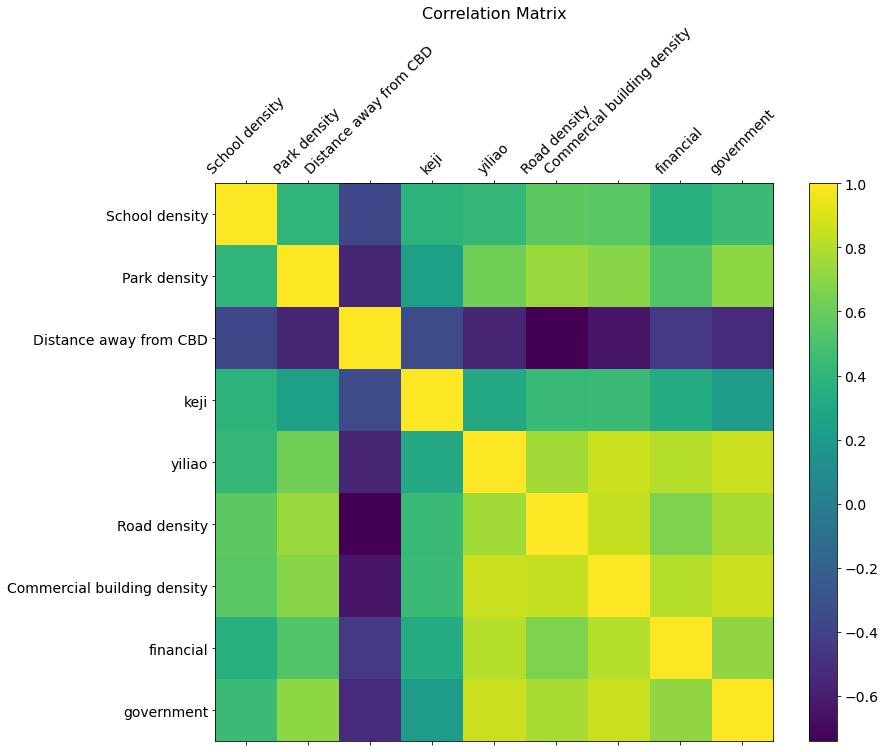

In [92]:
df = X
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(13, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [93]:
# calculating VIF
# This function is amended from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df = vif_df.drop('const')
        
        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [94]:
x_VIF = drop_column_using_vif_(X, thresh=5)
print("The columns remaining after VIF selection are:")
print(x_VIF.columns)

Max VIF: 9.434286348709609
Dropping: Commercial building density
Max VIF: 5.752241216890557
Dropping: yiliao
Max VIF: 5.679714549298217
Dropping: Road density
Max VIF: 3.0502712037908672
The columns remaining after VIF selection are:
Index(['School density', 'Park density', 'Distance away from CBD', 'keji',
       'financial', 'government'],
      dtype='object')


/Users/lin/opt/anaconda3/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Regression

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
reg = LinearRegression().fit(x_VIF, y)

In [97]:
print('Constant term: ', reg.intercept_)
df_coef_lr_VIF = pd.DataFrame({"var": x_VIF.columns.values, "coef":reg.coef_})
print(df_coef_lr_VIF)

Constant term:  0.24518578926087653
                      var      coef
0          School density  0.312542
1            Park density  0.278855
2  Distance away from CBD -0.369211
3                    keji  0.225735
4               financial  0.278080
5              government  0.170260


In [98]:
reg.score(x_VIF, y)                                            

0.69491449145851

In [99]:
# fit a lineare regression model using statsmodel
regressor_OLS = sm.OLS(endog=y, exog=sm.add_constant(x_VIF)).fit()
regressor_OLS.summary()

/Users/lin/opt/anaconda3/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Average housing prices   R-squared:                       0.695
Model:                                OLS   Adj. R-squared:                  0.689
Method:                     Least Squares   F-statistic:                     123.0
Date:                    Sun, 18 Sep 2022   Prob (F-statistic):           1.94e-80
Time:                            07:53:16   Log-Likelihood:                 207.23
No. Observations:                     331   AIC:                            -400.5
Df Residuals:                         324   BIC:                            -373.8
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2452      0.020     12.371      0.000       0.206       0.284
School density             0.3125      0.085      3.694      0.000       0.146       0.479
Park density               0.2789      0.065      4.287      0.000       0.151       0.407
Distance away from CBD    -0.3692      0.042     -8.820      0.000      -0.452      -0.287
keji                       0.2257      0.069      3.289      0.001       0.091       0.361
financial                  0.2781      0.083      3.355      0.001       0.115       0.441
government                 0.1703      0.056      3.033      0.003       0.060       0.281
==============================================================================
Omnibus:                       59.369   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.224
Skew:                           0.940   Prob(JB):                     7.83e-27
Kurtosis:                       5.276   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""